# Descriptive and Exploratory Analysis of the Data

Guillermo Hernández - Final Thesis 

## Importing and Preparation of the Data

In [1]:
import os
import time
import joblib
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

from etl.load_data import LoadData
from etl.train import ModelTrainer
from etl.evaluate import EvalModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
data_path = r'C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\data\datasets\WFDB_CPSC2018_data.csv'
label_path = r'C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\data\datasets\WFDB_CPSC2018_labels.csv'

load = LoadData()
data, labels = load.get_csv(data_path, label_path)

Fetching the CSV from
'C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\data\datasets\WFDB_CPSC2018_labels.csv'
 and 
'C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\data\datasets\WFDB_CPSC2018_data.csv' dataset.



In [3]:
data.head()

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,Age,Sex
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.183303,0.000000,0.000000,0.036515,0.077460,0.07746,74.0,1.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.145602,0.000000,0.000000,0.000000,0.00000,49.0,0.0
2,0.105830,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.048990,0.031623,0.155563,0.028284,0.00000,81.0,0.0
3,0.082844,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.176451,0.282274,0.491985,0.557386,0.42262,45.0,1.0
4,0.000000,0.056569,0.055136,0.0,0.0,0.055857,0.049800,0.060000,0.051381,0.151261,0.142829,0.00000,53.0,1.0


In [4]:
labels.head()

,59118001,164884008,164889003,164909002,164931005,270492004,284470004,426783006,429622005
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False


In [5]:
data.describe().iloc[[1,3,4,5,6,7]]

,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6,Age,Sex
mean,0.018590,0.039168,0.029894,0.016870,0.015186,0.028295,0.079602,0.148111,0.155090,0.173647,0.163273,0.134921,60.168073,0.53788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042640,0.094868,0.082275,0.000000,49.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121529,0.131156,0.145646,0.134309,0.104447,64.000000,1.00000
75%,0.000000,0.052366,0.000000,0.000000,0.000000,0.000000,0.123675,0.187864,0.191610,0.211608,0.190613,0.150997,75.000000,1.00000
max,2.427119,2.380016,2.242016,2.122841,2.038655,1.985258,2.893454,4.231217,3.505339,4.226049,3.808180,3.935741,104.000000,1.00000


Only five missing values on age and some negative values

### Train - Test Split

Data will be explored and all the changes will be made on the train portion. This will ensure that the test data is on the same state as received and all the transformations are applied directly on the ML pipelines. 

After that, `Sex` labels are modified.

In [6]:
pd.DataFrame(labels.apply(sum, axis=0), columns=['Porportion of True']).transpose()/labels.shape[0]

,59118001,164884008,164889003,164909002,164931005,270492004,284470004,426783006,429622005
Porportion of True,0.270031,0.101789,0.177548,0.034317,0.031991,0.104988,0.089574,0.133488,0.126363


In [7]:
data.loc[:, 'Sex'] = data.loc[:, 'Sex'].replace(to_replace=[0.0,1.0], value=['Female', 'Male'])
data.loc[:, 'Sex'] = data.loc[:, 'Sex'].replace(to_replace=[0.0,1.0], value=['Female', 'Male'])

In [8]:
labels.head()

,59118001,164884008,164889003,164909002,164931005,270492004,284470004,426783006,429622005
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False


In [9]:
data.isna().sum().sort_values(ascending=False).head()

Age    5
I      0
II     0
III    0
aVR    0
dtype: int64

Only a few missing values found in `Age`. Those recordings could be deleted without further consequences, but the treatment of missing values must be assesed on the ML pipeline to avoid errors.

## Visualization of the Variables 

### Univariate Visualization - Distributions

In the following cells the intention is to build an adequate way of visualizing the features individually. For this purpose, both histograms and kernel densities are displayed.

`feat_names` and `labels_names` are used as indices on the next chunks. `feat_names` does not include either age or sex, which are analyzed separately due to their different nature. 

In [10]:
feat_names = list(data.columns)[0:11]
label_names = labels.columns.to_list()

print('Variable list:\n')
for feat in feat_names:
    print(feat)
print('\nLabel list:\n')
for lab in label_names:
    print(lab)

Variable list:

I
II
III
aVR
aVL
aVF
V1
V2
V3
V4
V5

Label list:

59118001
164884008
164889003
164909002
164931005
270492004
284470004
426783006
429622005


The following plot represents the gaussian kde distribution of the features in logarithmic scale. See that the first peak correspond to the zeroes, showing that the data matrix is highly sparsed as most of the records show no voltage detected. However, the frequency of zero-valued entries highly depends on the lead observed. In any case, featurres are extremely right skewed, which will be further discussed in following sections.

Also, non-zero measurements seem to be mainly concentrated in potentials that vary in between 0.1 and 0.3 mV. 

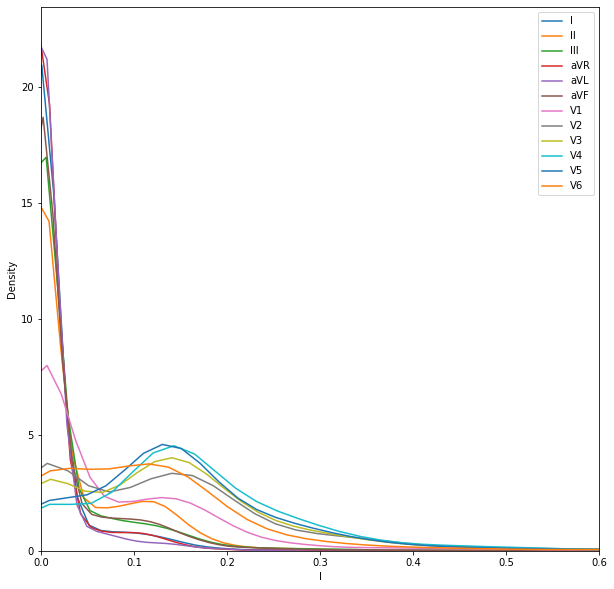

In [11]:
feat_names = list(data.columns)[0:12]

plt.figure(figsize=(10, 10))
plt.xlim((0,0.6))
for feat in feat_names:
    sns.kdeplot(data[feat])
    plt.legend(labels=feat_names)

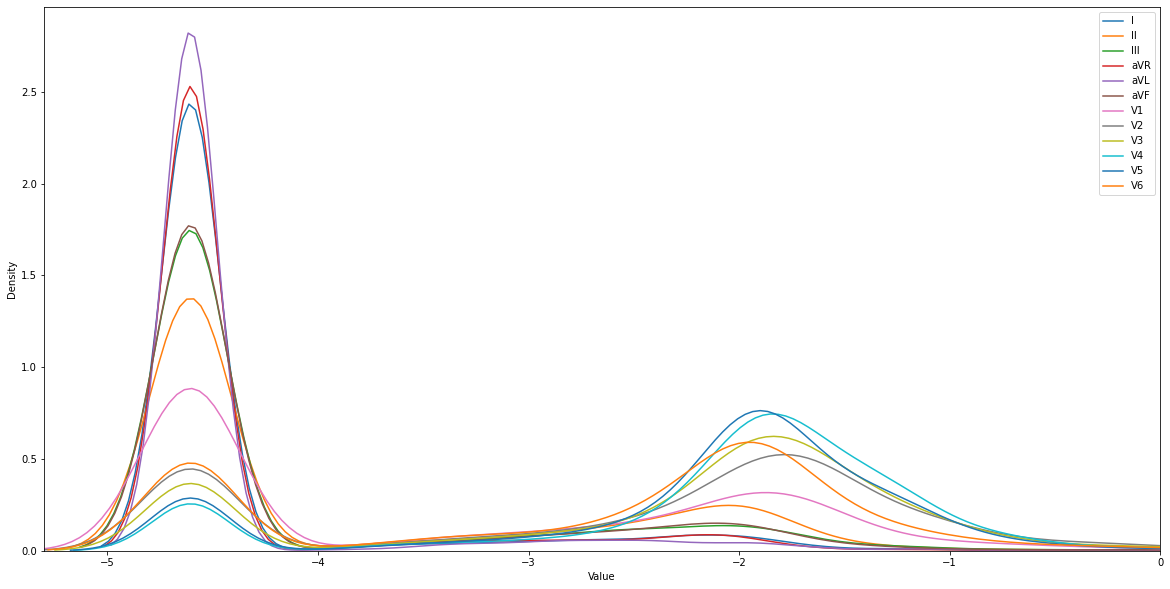

In [12]:
feat_names = list(data.columns)[0:12]

plt.figure(figsize=(20, 10))
plt.xlim((-5.3,0))
for feat in feat_names:
    sns.kdeplot(np.log(data[feat]+0.01))
    plt.legend(labels=feat_names)
    plt.xlabel('Value')

The next chunks allow to switch in between features and labels and visualize the distribution of the first with respect to the latter by modifying the index selected in the first two lines. Also, axis limits and binwidths are modifiable. Distributions are normalized to probabilities for the sake of comprehension, as classes (labels) are highly unbalanced towards False (the observed user does not suffer from the cardiopathy). 

It is observed that, as a general rule, zeroes are less common proportionally for the population where the selected anomaly is true.

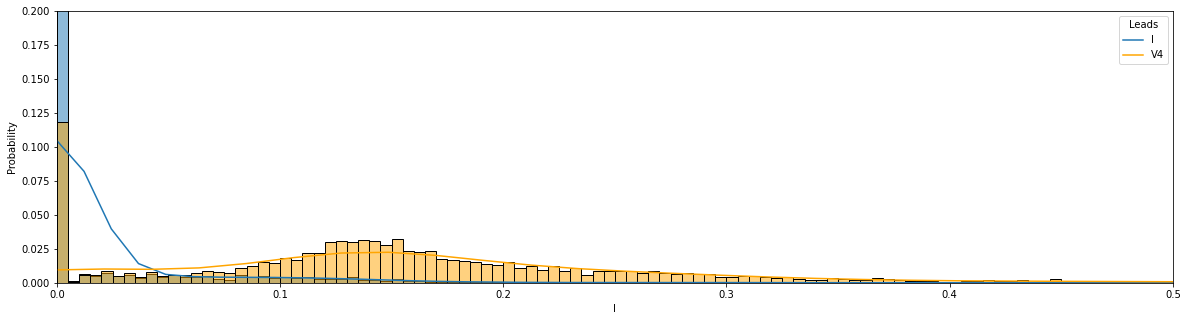

In [13]:
feat0 = feat_names[0]
feat1 = feat_names[9]

plt.figure(figsize=(20,5))
plt.xlim((0,0.5))
plt.ylim((0,0.2))
sns.histplot(data[feat0], stat='probability', common_norm=False, 
             binwidth=0.005, log_scale=False, kde=True)
sns.histplot(data[feat1], stat='probability', common_norm=False, 
             binwidth=0.005, log_scale=False, kde=True, color='orange')
plt.legend(title='Leads', labels=[feat0, feat1])
plt.show()

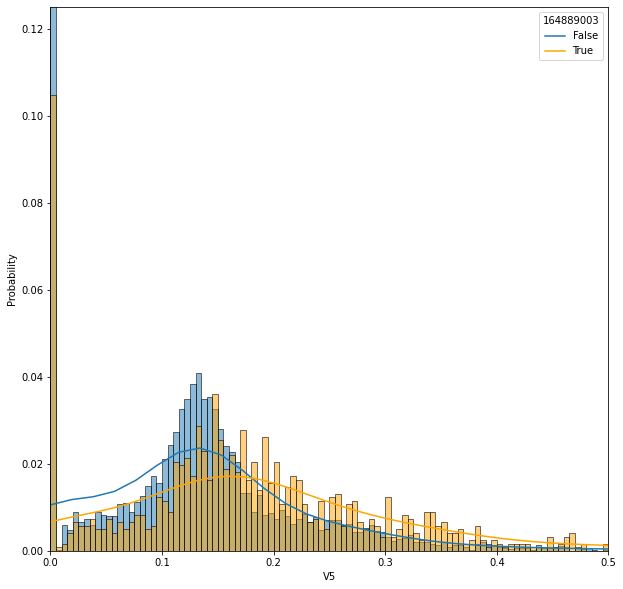

In [14]:
lab = label_names[2]
feat = feat_names[10]

data_0 = data.loc[labels[lab] == False]
data_1 = data.loc[labels[lab] == True]

plt.figure(figsize=(10, 10))
plt.xlim((0,0.5))
plt.ylim((0,0.125))
sns.histplot(data_0[feat], stat='probability', common_norm=False, 
             binwidth=0.005, log_scale=False, kde=True)
sns.histplot(data_1[feat], stat='probability', common_norm=False, 
             binwidth=0.005, log_scale=False, kde=True, color='orange')
plt.legend(title=lab, labels=['False', 'True'])
plt.show()

The same distributions are displayed on logarithmic scale, ignoring the zeroes. 

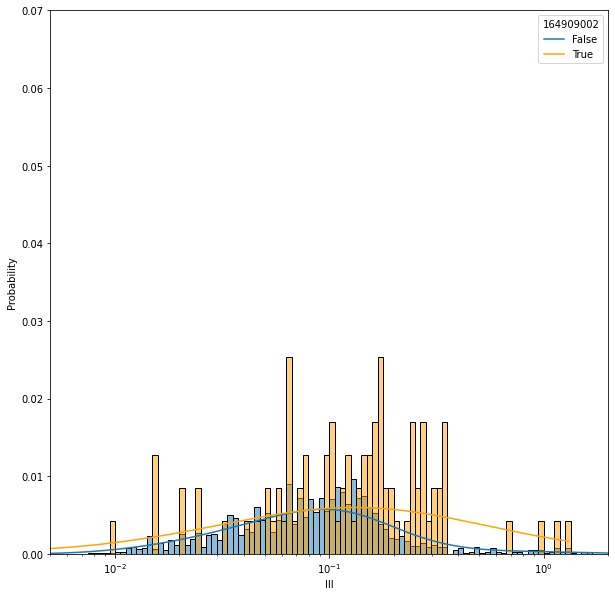

In [15]:
lab = label_names[3]
feat = feat_names[2]

data_0 = data.loc[labels[lab] == False, feat_names]+0.0001
data_1 = data.loc[labels[lab] == True, feat_names]+0.0001

plt.figure(figsize=(10, 10))
plt.xlim((0.005,2))
plt.ylim((0,0.07))
sns.histplot(data_0[feat], stat='probability', common_norm=False, 
             binwidth=0.025, log_scale=True, kde=True)
sns.histplot(data_1[feat], stat='probability', common_norm=False, 
             binwidth=0.025, log_scale=True, kde=True, color='orange')
plt.legend(title=lab, labels=['False', 'True'])
plt.show()

Age seems to be a key factor in some anomalies (e.g. in the diseased tagged as `426783006`), while some others show small to none shifts in the response.  

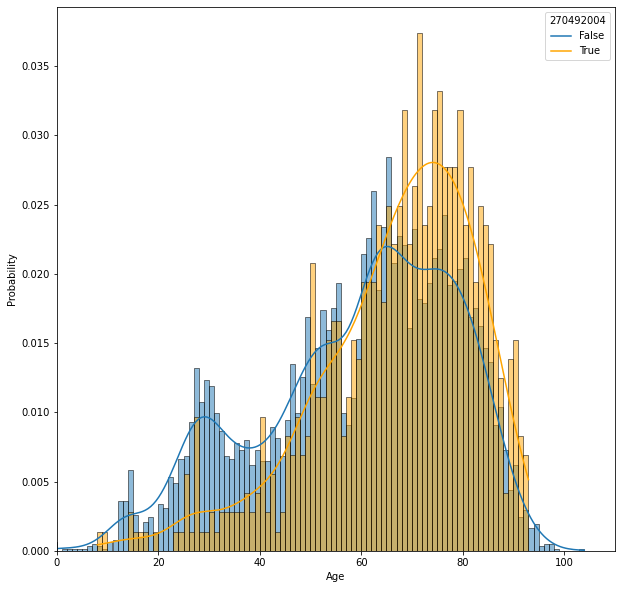

In [16]:
lab = label_names[5]

data_0 = data.loc[labels[lab] == False]
data_1 = data.loc[labels[lab] == True]

plt.figure(figsize=(10, 10))
plt.xlim((0,110))
#plt.ylim((0,60))
sns.histplot(data_0['Age'], stat='probability', common_norm=False, 
             binwidth=1, kde=True)
sns.histplot(data_1['Age'], stat='probability', common_norm=False, 
             binwidth=1, kde=True, color='orange')
plt.legend(title=lab, labels=['False', 'True'])
plt.show()

`Sex` is the only binomial variable, and for which the bar plot is selected as visualization tool. See that the total female observations are 3178 and 3699 for the males.

<AxesSubplot:xlabel='Sex', ylabel='count'>

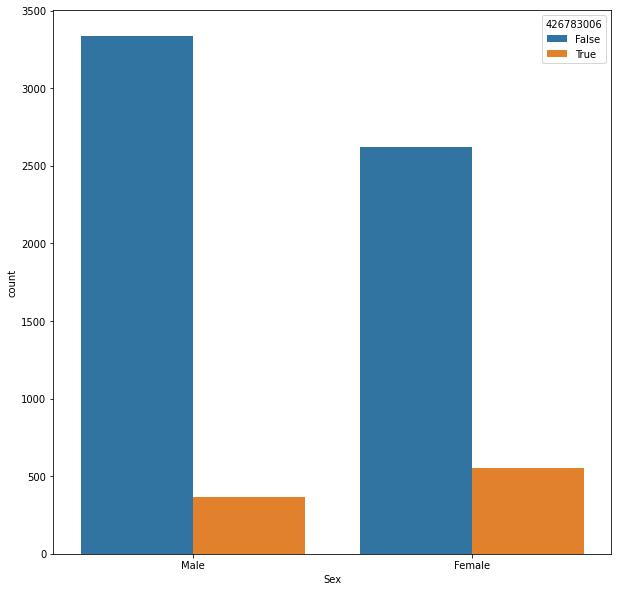

In [17]:
lab = label_names[7]

data_0 = data.loc[labels[lab] == False]
data_1 = data.loc[labels[lab] == True]

data_labeled = pd.concat([data['Sex'], labels[lab]], axis=1)

plt.figure(figsize=(10, 10))
sns.countplot(x='Sex', data=data_labeled, hue=lab, )

### Outlier detection

As previously observed, the distributions of the lead features are highly right skewed due to a majority of zero or near-zero records and a very steep drop of the ocurrences for higher voltages. This is a typical situation for the presence of outlying values that could affect the performance of the algorithms.

Below, differences between the mean and median are displayed for the twelve leads. See that the relative difference can be as big as 100% as the median is 0 for those features. 

Also remark that `Age` and `Sex` are deliberatedly out of the outlier analysis as there is no very extreme cases in the first and outlier detection does not apply to binomial fields as the latter.

In [18]:
data_train, data_test, labels_train, labels_test = load.split_train_test()

Separating between train and test samples, test size = 25.0%.


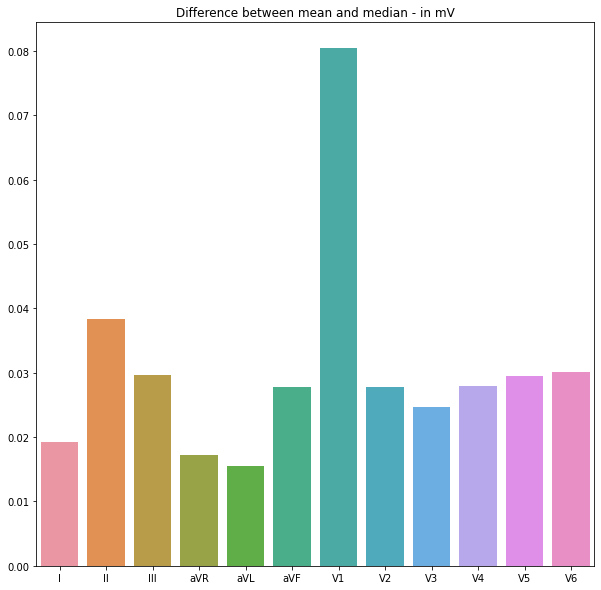

In [19]:
mean_median = data_train.describe().loc[['mean','50%'], feat_names]
diff = mean_median.loc['mean'] - mean_median.loc['50%']

plt.figure(figsize=(10, 10))
plt.title('Difference between mean and median - in mV')
sns.barplot(x=feat_names, y=diff.values)
plt.show()

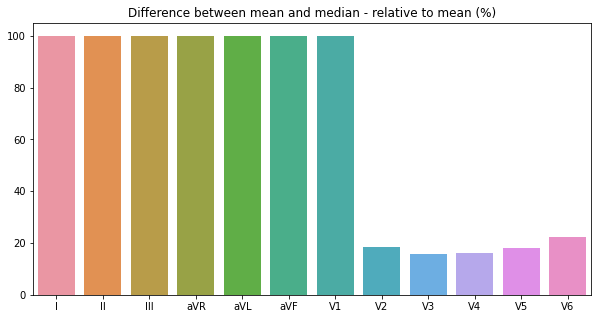

In [20]:
mean_median = data_train.describe().loc[['mean','50%'], feat_names]
diff = mean_median.loc['mean'] - mean_median.loc['50%']
diff_rel = (mean_median.loc['mean'] - mean_median.loc['50%'])*100/mean_median.loc['mean']

plt.figure(figsize=(10, 5))
plt.title('Difference between mean and median - relative to mean (%)')
sns.barplot(x=feat_names, y=diff_rel.values)
plt.show()

There are several techniques to automatize the detection of outliers. The simplest of them is to impose a static rule: The top percentile (e.g. the highest 5%) of the observations are considered as outliers. The problem with this approach is that, as the features are mostly zeroes -till the point the 0.5 quantiles equal zero for some of the leads-, selecting for instance a top 5% as threshold could delete a huge part of the important information and inflate the zero-valued part even more. 

This can be seen on the plots below by modifying `quant` and observing where the vertical red line sits.

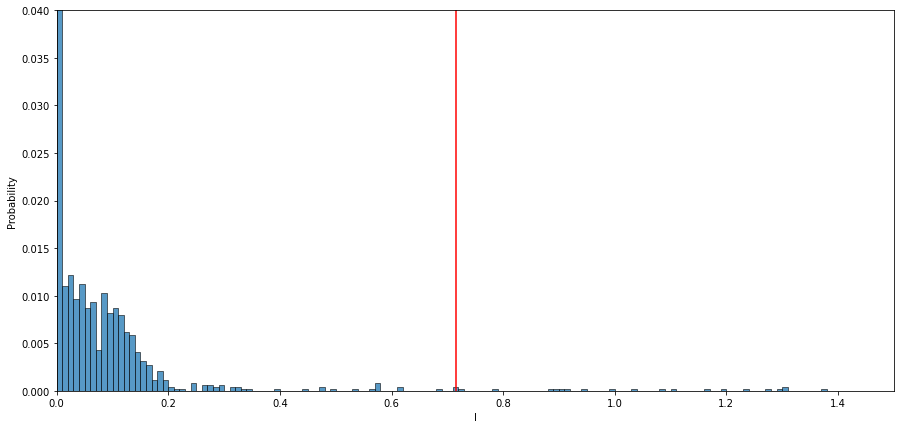

In [21]:
feat = feat_names[0]
quant = 0.995

plt.figure(figsize=(15, 7))
plt.xlim((0,1.5))
plt.ylim((0,0.04))
sns.histplot(data_train[feat], stat='probability', common_norm=False, 
             binwidth=0.01, log_scale=False, kde=False)
plt.axvline(data_train[feat].quantile(quant), color='red')
plt.show()

The same comparison could be done for the features separated on the response value, to see if deleting those extra values could bias the future model. The reality is that, for most of the features and labels, outlying values are more correspondant to individuals not suffering from the disease. Therefore, we could be deleting some precious information but it is gentle with the imbalance of the classes.

However, the number of observations that would be potentially deleted would be small as the quantile `q` will be set very near to zero (e.g. 0.99).

Proportions for the q=0.995 outliers from feat=aVL and lab=164931005:

164931005
False    1.0
Name: 164931005, dtype: float64

Compared to the whole set distribution:

164931005
False    0.969168
True     0.030832
Name: 164931005, dtype: float64


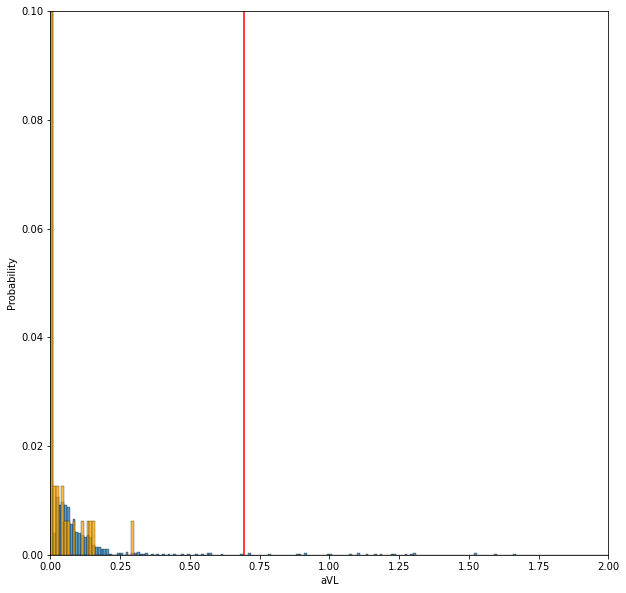

In [22]:
lab = label_names[4]
feat = feat_names[4]
quant = 0.995

outlier_labels = labels_train.loc[data_train[feat] >= data_train[feat].quantile(quant), lab]
print('Proportions for the q=' + str(quant) + ' outliers from feat=' + feat + ' and lab=' + lab + ':\n')
print(outlier_labels.groupby(by=outlier_labels).count()/len(outlier_labels))
print('\nCompared to the whole set distribution:\n') 
print(labels_train[lab].groupby(labels_train[lab]).count()/len(labels_train[lab]))

data_0 = data_train.loc[labels[lab] == False]
data_1 = data_train.loc[labels[lab] == True]

plt.figure(figsize=(10, 10))
plt.xlim((0,2))
plt.ylim((0,0.1))
sns.histplot(data_0[feat], stat='probability', common_norm=False, 
             binwidth=0.01, log_scale=False, kde=False)
sns.histplot(data_1[feat], stat='probability', common_norm=False, 
             binwidth=0.01, log_scale=False, kde=False, color='orange')
plt.axvline(data_train[feat].quantile(quant), color='red')
plt.show()

Based on this criteria, the rule will be to apply `q` = 0.99 as the probability threshold for the outliers. This is a rule that seems to work well with all features. See that ages seem to be greater for observations considered as outliers, while sex keeps quite close to the 44% / 56% split found on the dataset.

In [23]:
feat = feat_names[8]
quant = 0.995

outlier_age = data_train.loc[data_train[feat] >= data_train[feat].quantile(quant), 'Age'].mean()
outlier_sex = data_train.loc[data_train[feat] >= data_train[feat].quantile(quant), 'Sex']

print('Mean age of outliers for the q=' + str(quant) + ' outliers from feat=' + feat + ' and lab=' + lab + ':\n') 
print(outlier_age)
print('\nWhile the mean for the whole train dataset is:\n')
print(data_train['Age'].mean())
print('\n\nSex distribution of outliers for the q=' + str(quant) + ' outliers from feat=' + feat + ' and lab=' + lab + ':\n') 
print(outlier_sex.groupby(by=outlier_sex).count()/len(outlier_sex))
print('\nCompared to the whole set distribution:\n') 
print(data_train['Sex'].groupby(data_train['Sex']).count()/len(data_train['Sex']))

Mean age of outliers for the q=0.995 outliers from feat=V3 and lab=164931005:

69.5

While the mean for the whole train dataset is:

60.424607025033964


Sex distribution of outliers for the q=0.995 outliers from feat=V3 and lab=164931005:

Sex
Female    0.5
Male      0.5
Name: Sex, dtype: float64

Compared to the whole set distribution:

Sex
Female    0.457436
Male      0.542564
Name: Sex, dtype: float64


Once the cutting point is selected, some automatic outlier detection techniques can be applied. Isolation forest is one of the most popular of them, and it does not assume normality of the data. It ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The argument `contamination` refers to the proportion of observations to be detected as outliers.

In [24]:
iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(data_train.iloc[:,0:12])
outliers = data_train.loc[yhat == -1, :]

In the histogram below, it can be seen that the selection of the global outliers does not always have to coincide with the feature-to-feature ones, but generally they are located on the right side of the distribution as expected.  

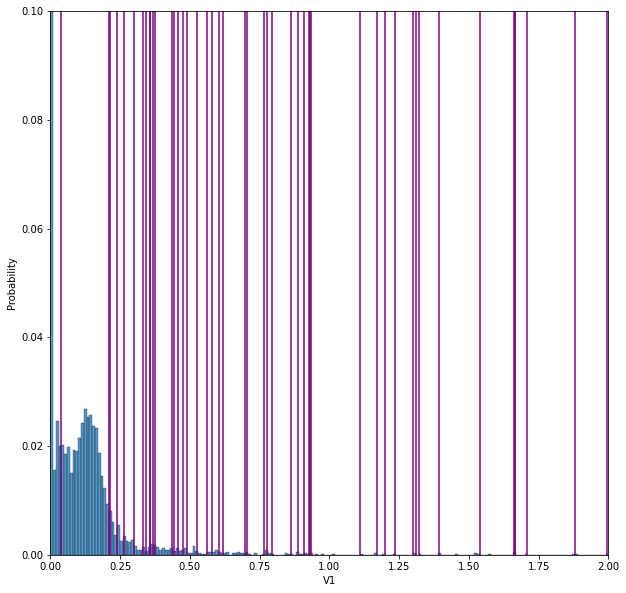

In [25]:
feat = feat_names[6]
quant = 0.995

plt.figure(figsize=(10, 10))
plt.xlim((0,2))
plt.ylim((0,0.1))
sns.histplot(data_train[feat], stat='probability', common_norm=False, 
             binwidth=0.01, log_scale=False, kde=False)
for outlier in outliers[feat]:
    plt.axvline(outlier, color='purple')
plt.show()

The outlier detection and elimination are transformations to the data that are only applied on the training data. Those observations can be eliminated in this step.

In [26]:
mask = yhat != -1
data_train, labels_train = data_train.loc[mask, :], labels_train.loc[mask, :]

### Multivariate Visualization

The next step is to evaluate the variables collectively to look for possible correlations and other insights. Note that the number of variables  processed and their names by the models is imposed in advance, and therefore this is not an exercise of feature reduction in principle. However, dimension reduction techniques as PCA might be useful and could appear in some models. 

For the leads, the most suitable display is the scatterplot, which will be limited to 2D graphs.

Correlation between II and aVR
0.508021581512329





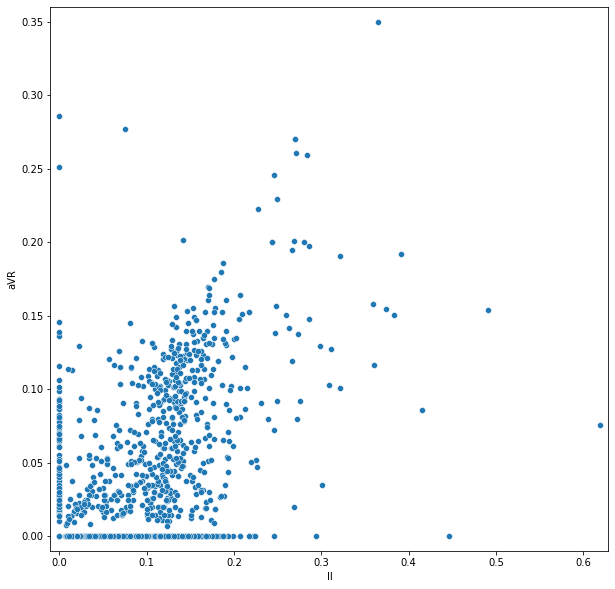

In [27]:
feat_x = feat_names[1]
feat_y = feat_names[3]

corr = data_train[feat_x].corr(data_train[feat_y], method='kendall')
print('Correlation between ' + feat_x + ' and ' + feat_y)
print(corr)
print('\n\n')

plotdata = pd.concat([data_train[feat_x], data_train[feat_y]], axis=1)

plt.figure(figsize=(10, 10))
plt.xlim((-0.01, max(data_train[feat_x]+0.01)))
plt.ylim((-0.01, max(data_train[feat_y]+0.01)))
sns.scatterplot(x=feat_x, y=feat_y, data=plotdata, legend='auto')
#plt.axline(xy1=(0,0), xy2=(1, corr), color='red')
plt.show()

From the plots above, it can be concluded that there is, in fact, some moderately correlated features. The same process can be followed for label-split data.

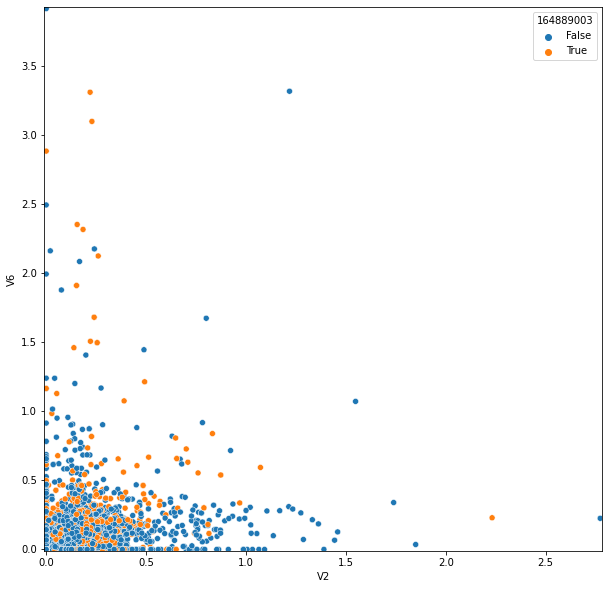

In [28]:
feat_x = feat_names[7]
feat_y = feat_names[11]
lab = label_names[2]

corr = data_train[feat_x].corr(data_train[feat_y], method='kendall')

plotdata = pd.concat([data_train[feat_x], data_train[feat_y], labels_train[lab]], axis=1)

plt.figure(figsize=(10, 10))
plt.xlim((-0.01, max(data_train[feat_x]+0.01)))
plt.ylim((-0.01, max(data_train[feat_y]+0.01)))
sns.scatterplot(x=feat_x, y=feat_y, data=plotdata, legend='auto', hue=lab)
# plt.axline(xy1=(0,0), xy2=(1, corr), color='red')
plt.show()

The same scatterplots can be drawn for comparison with `Age`. Interesting insights are found, as it can be seen that some diseases are preferentially found at older or younger ages without much influence of the lead value, and viceversa.

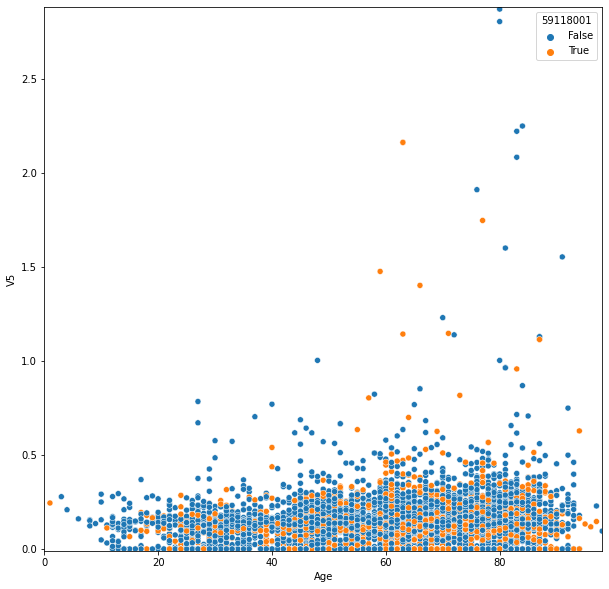

In [29]:
feat_x = 'Age'
feat_y = feat_names[10]
lab = label_names[0]

corr = data_train[feat_x].corr(data_train[feat_y])

plotdata = pd.concat([data_train[feat_x], data_train[feat_y], labels_train[lab]], axis=1)

plt.figure(figsize=(10, 10))
plt.xlim((-0.01, max(data_train[feat_x]+0.01)))
plt.ylim((-0.01, max(data_train[feat_y]+0.01)))
sns.scatterplot(x=feat_x, y=feat_y, data=plotdata, legend='auto', hue=lab)
plt.show()

In the case of `Sex`, scatterplots do not make sense. Some alternative is the use of the same histograms as above. However, boxplots could work as well, but it is the accumulation of zeroes up to the third quartile that makes the plots look useless in most of the cases. In any case, no big differences in the distributions were found rather than small shifts to the right for some labels when taking the male population.

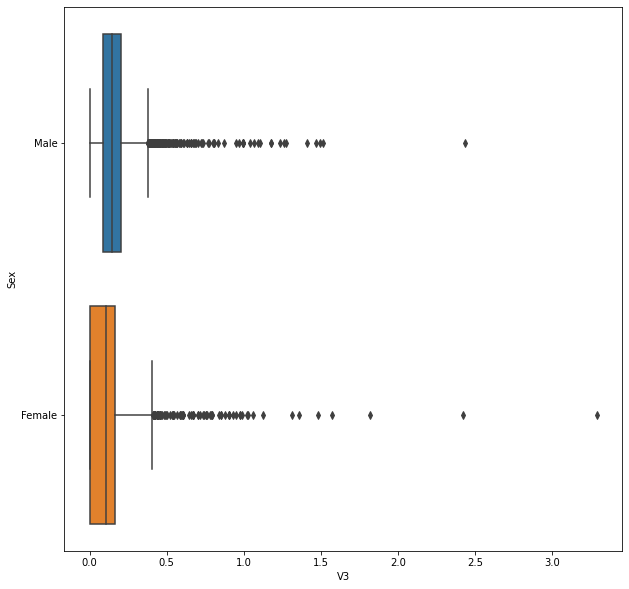

In [30]:
feat_x = feat_names[8]
feat_y = 'Sex'

plotdata = pd.concat([data_train[feat_x], data_train[feat_y]], axis=1)

plt.figure(figsize=(10, 10))
# plt.xlim((0, max(data_train[feat_x])))
# plt.ylim((0, max(data_train[feat_y])))
sns.boxplot(x=feat_x, y=feat_y, data=plotdata, orient="h")
plt.show()

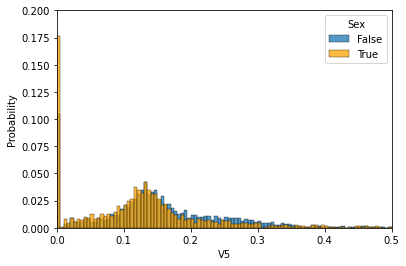

In [31]:
feat = feat_names[10]
lab = 'Sex'

data_0 = data_train.loc[data_train[lab] == 'Male']
data_1 = data_train.loc[data_train[lab] == 'Female']

plt.xlim((0,0.5))
plt.ylim((0,0.2))
sns.histplot(data_0[feat], stat='probability', common_norm=False, 
             binwidth=0.005, log_scale=False, kde=False)
sns.histplot(data_1[feat], stat='probability', common_norm=False, 
             binwidth=0.005, log_scale=False, kde=False, color='orange')
plt.legend(title=lab, labels=['False', 'True'])
plt.show()

To further analysis of the correlations between features, those columns can be standarized. On the pairwise correlation functions applied, Spearman's correlation is not used -as the data is not close to normal-. Pearson's assumes linearity and correlation, which is far from true. 

Another option might be Kendall rank correlation coefficients, which is based on the order of the observations inside their poulations. This is then used for ordinal valiables then, which is not the case for the leads. However, it outcomes the problems or nonnormality and nonlinearity.

Data is scaled to a standard distribution before calculating correlations. 

In [32]:
data_train_std = data_train.loc[:, data_train.columns != 'Sex'].to_numpy()
scaler = StandardScaler()
data_train_std = pd.DataFrame(scaler.fit_transform(data_train_std), columns=feat_names+['Age'])

<AxesSubplot:>

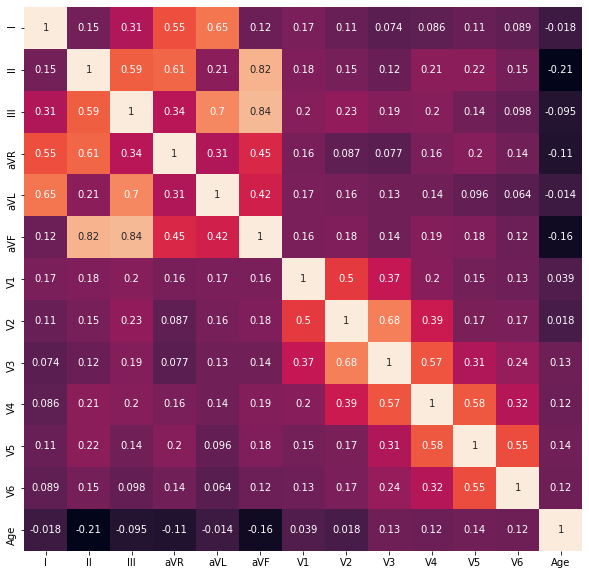

In [33]:
corr = data_train_std.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=False, annot=True)

<AxesSubplot:>

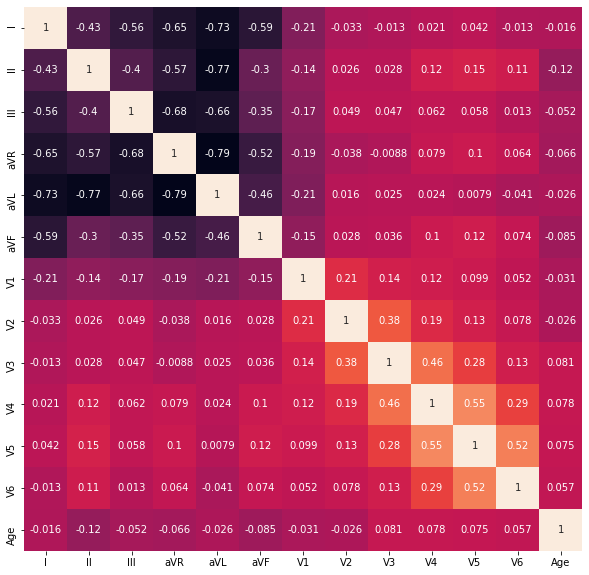

In [34]:
corr = data_train_std.corr(method='kendall')
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=False, annot=True)

These two last heatmaps show:

- As a general rule, correlations are quite high, both for Pearson's and Kendall's. The first six leads show the strongest relations. Higher correlations in the ches leads (V1 to V2, V2 to V3..) can be explained by the positions of the ECG electrodes, closer one to another.
- Low correlations of the leads with `Age`. 

The data matrix is highly sparsed. Other possible modification is to remove the ocurrences where both columns are zero, which is out of scope in this work. Also, real data is probably similar to the one used in this project, the model should appear the best possible to real ECG measurents to be effective. Therefore, eliminating those zeros could be very damaging to the prediction.

## Machine Learning Modeling

### Structure of the Pipelines 

The algorithms are composed of the same transformations, in the following order:

1) Preprocessor: Numeric (leads and age) and categorical vaiables (sex) are separated to be processed in different ways using `ColumnTransformer`. Both transformers include a imputer for missing values. A scaler standarizes the numeric varibles and a encoder prepares the `Sex` variable.

2) Classifier: The model itself. The following algorithms will be used for all lead combinations proposed:
- Logistic Regression
- Random Forest
- Extreme Gradient Boosting
- Naive Bayes
- k Nearest Neighbors

The following cell generates two Random Forest models using `ModelTrain` class from *etl/train.py*. One with a hyperparameter grid set up, and one using `RandomForestClassifier`'s default configuration.

In [35]:
data, labels = load.get_csv(data_path, label_path)
data_train, data_test, labels_train, labels_test = load.split_train_test()

# Outlier Elimination pre-training
iso = IsolationForest(contamination=0.01)
yhat = iso.fit_predict(data_train.iloc[:,0:12])
mask = yhat != -1
data_train, labels_train = data_train.loc[mask, :], labels_train.loc[mask, :]

Fetching the CSV from
'C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\data\datasets\WFDB_CPSC2018_labels.csv'
 and 
'C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\data\datasets\WFDB_CPSC2018_data.csv' dataset.

Separating between train and test samples, test size = 25.0%.


In [36]:
model_no_grid = ModelTrainer(classifier=RandomForestClassifier(), 
                             classifier_name='RF_no_grid', 
                             lead_set='six_leads')

model_no_grid.show_leads()

['I', 'II', 'III', 'aVR', 'aVL', 'aVF']


In [37]:
model_no_grid.get_hyperps()['steps']

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaler', StandardScaler())]),
                                   ['I', 'II', 'III', 'aVR', 'aVL', 'aVF',
                                    'Age']),
                                  ('cat',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('encoder', OneHotEncoder())]),
                                   ['Sex'])])),
 ('pca', PCA()),
 ('classifier', RandomForestClassifier())]

Model is trained and saved in the defined directory. `n_jobs = None` equals to not parallelizing the process. This is a multiplication of computational times but parallelization fails to compile for an undiscovered reason. 

In [38]:
model_no_grid.train(data_train, labels_train, n_jobs=None)
model_no_grid.save_models(folder='models\\jupyter_demo', include_date=False)

   Training for label 59118001

   Training for label 164884008

   Training for label 164889003

   Training for label 164909002

   Training for label 164931005

   Training for label 270492004

   Training for label 284470004

   Training for label 426783006

   Training for label 429622005

Training done.
Models saved on C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\models\jupyter_demo


Below, training the with a parameter grid. Not all used hyperparameters are displayed on this cell. Dictionaries containing the grids are modifiedand stored in a separated file: *etl/assets/grids.py*. 

In [63]:
model_grid = ModelTrainer(classifier=RandomForestClassifier(), 
                             classifier_name='RF_grid', 
                             lead_set='six_leads')

model_grid.set_grid({
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': ['balanced', 'balanced_subsample']
})

model_grid.train(data_train, labels_train)
model_grid.save_models(folder='models\\jupyter_demo')

Custom hyperparameter grid was set.
   Training for label 59118001



KeyboardInterrupt: 

## Evaluation of the models

This section is dedicated to show the functionalities of the evaluation class `EvalModel` found in *etl/evaluate.py*, as well for evaluating a concrete model as an example -a twelve-lead, Random Forest classifier without PCA being applied. 

`EvalModel` allows to adjust the threshold (`proba_threshold`) of probability for which a observation is consideres as positive. It is a crucial part of the adjustments made on the model to improve the performance. However, note that some plots are created using the estimated probabilities so they do not depend on the threshold. 

In [85]:
model_dir = r'C:\Users\ghdez\Mi unidad\MASTER UC3M\TFM\Repo\models\twelve_leads'
model_filename = r'_twelve_leads_LR.pkl'

model_path = model_dir + '\\' + model_filename

eval_rf = EvalModel(model_path=model_path,
                         data_test=data_test, 
                         labels_test=labels_test, 
                         proba_threshold = 0.5)

<Figure size 720x720 with 0 Axes>

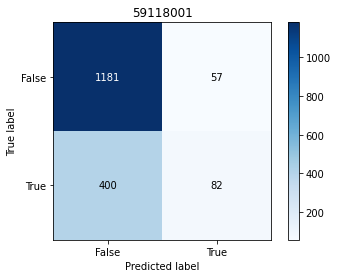

<Figure size 720x720 with 0 Axes>

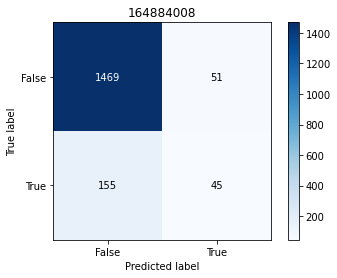

<Figure size 720x720 with 0 Axes>

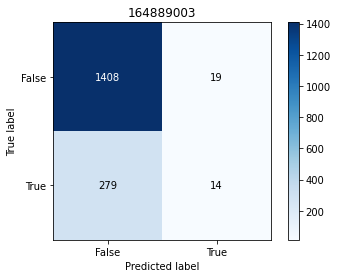

<Figure size 720x720 with 0 Axes>

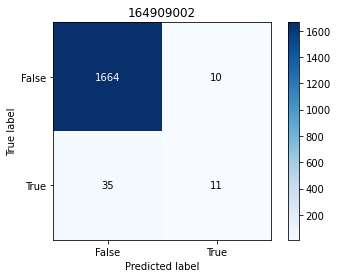

<Figure size 720x720 with 0 Axes>

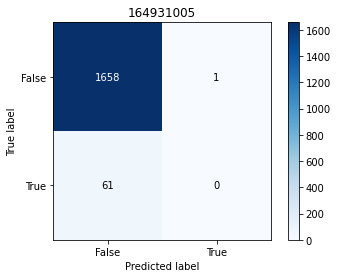

<Figure size 720x720 with 0 Axes>

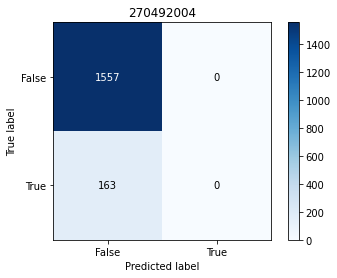

<Figure size 720x720 with 0 Axes>

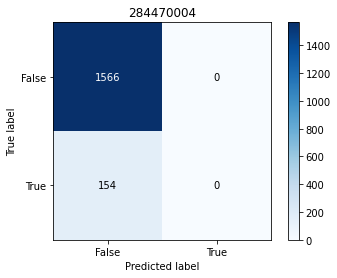

<Figure size 720x720 with 0 Axes>

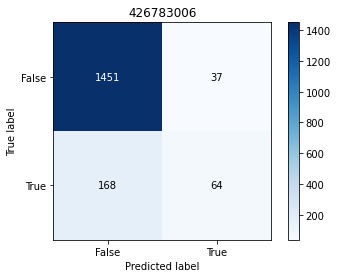

<Figure size 720x720 with 0 Axes>

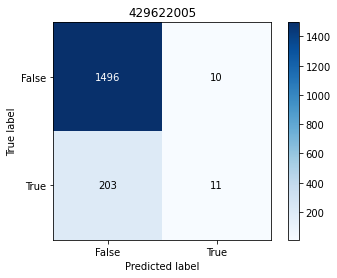

In [86]:
eval_rf.plot_confusion()

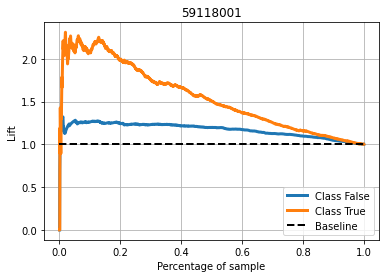

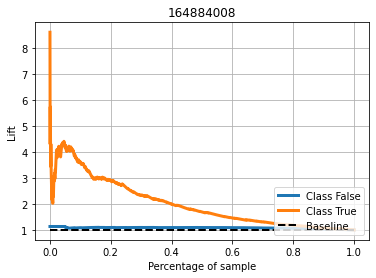

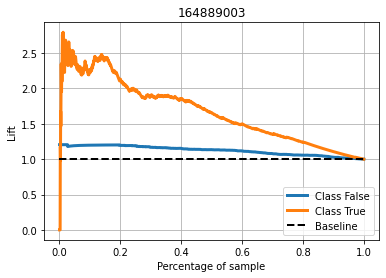

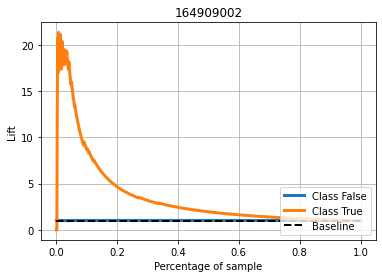

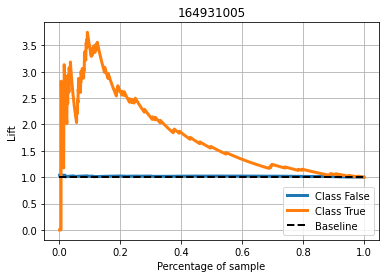

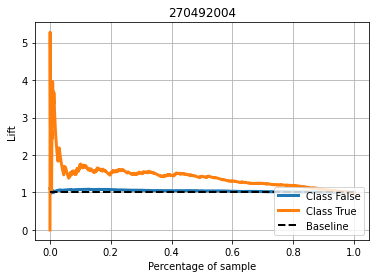

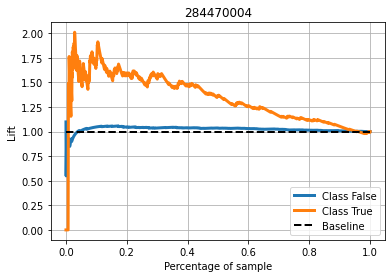

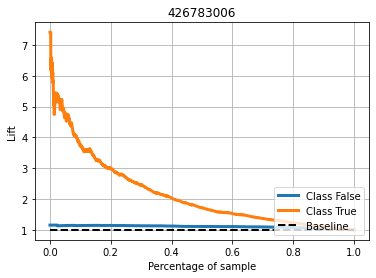

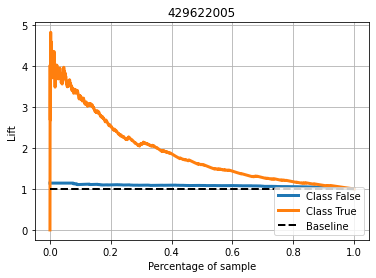

In [87]:
eval_rf.plot_lift()

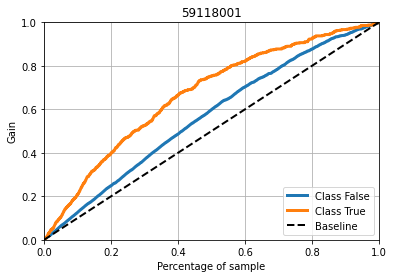

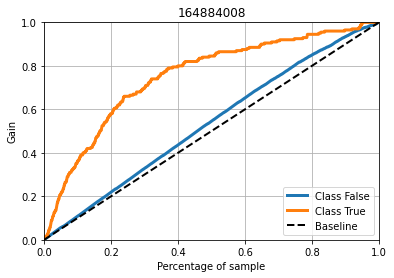

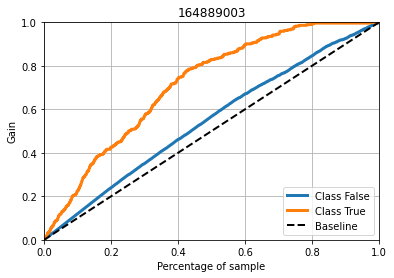

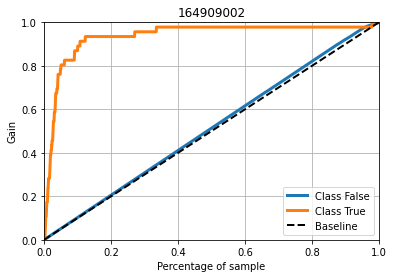

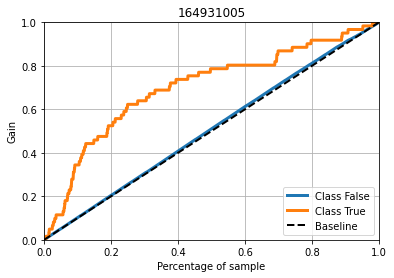

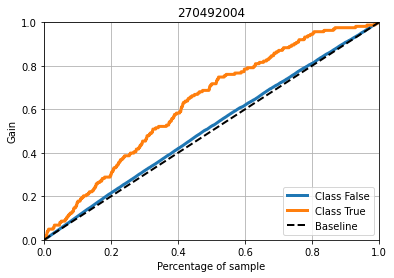

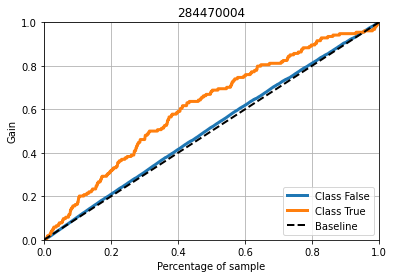

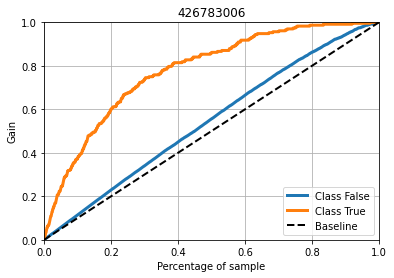

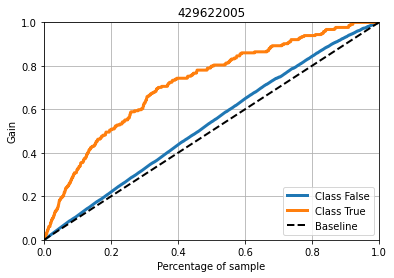

In [88]:
eval_rf.plot_cumul_gains()

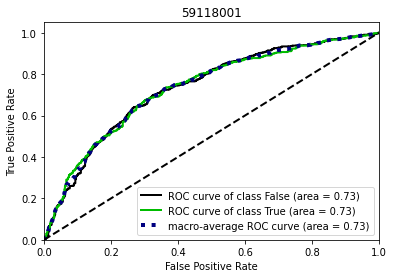

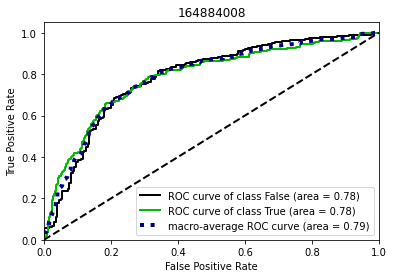

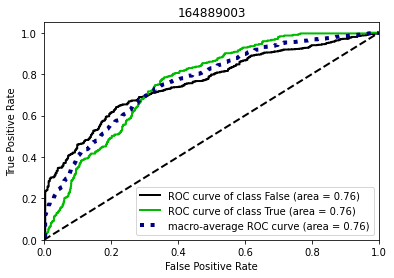

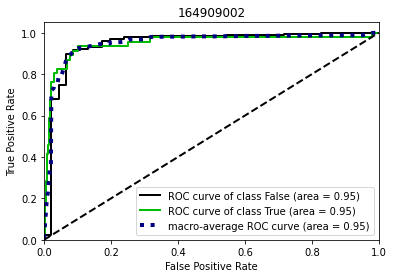

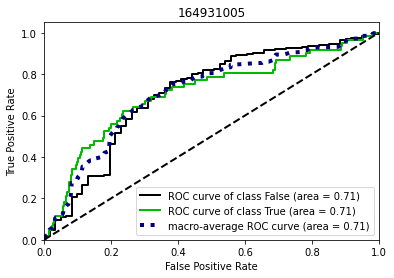

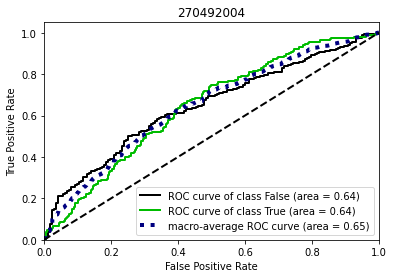

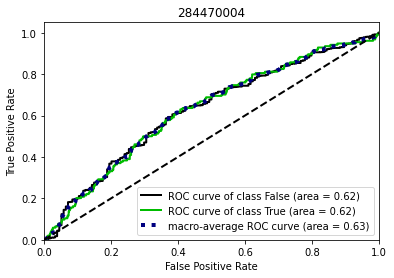

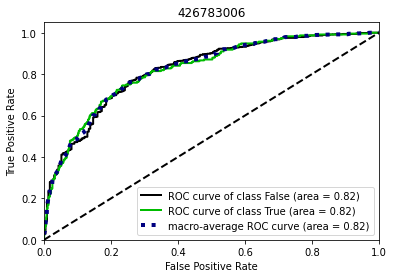

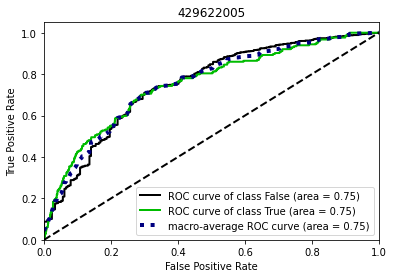

In [89]:
eval_rf.plot_roc()

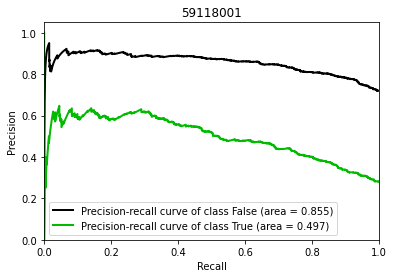

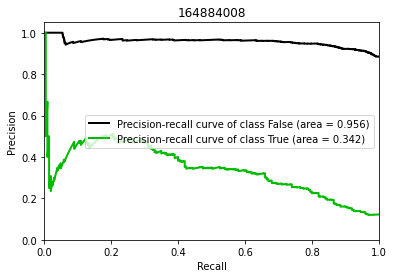

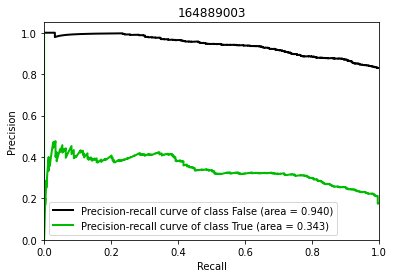

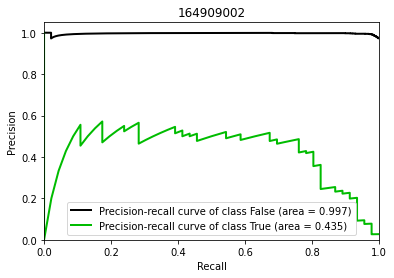

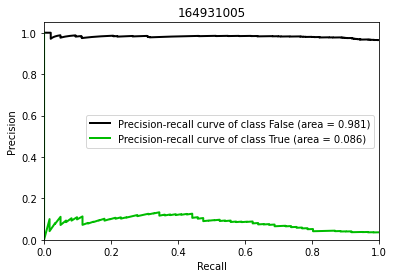

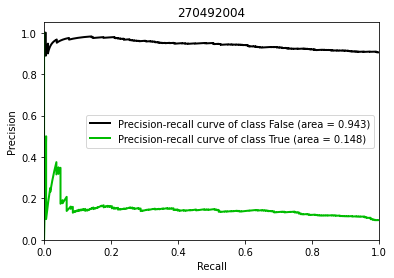

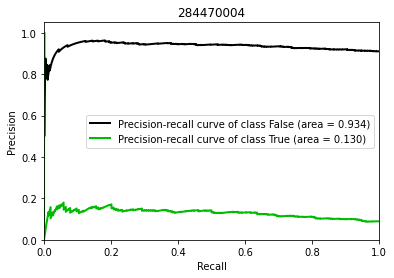

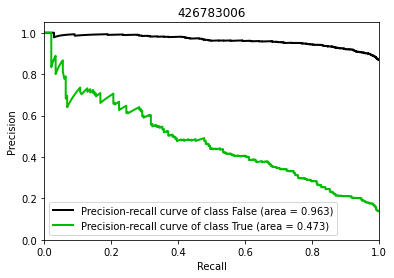

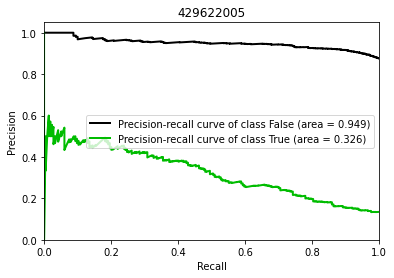

In [90]:
eval_rf.plot_prec_rec()

In [91]:
eval_rf.accuracy()

59118001
0.7343023255813953

164884008
0.8802325581395349

164889003
0.8267441860465117

164909002
0.9738372093023255

164931005
0.963953488372093

270492004
0.9052325581395348

284470004
0.9104651162790698

426783006
0.8808139534883721

429622005
0.8761627906976744



In [92]:
eval_rf.balanced_accuracy()

59118001
0.5620412390483915

164884008
0.5957236842105263

164889003
0.5172334619275742

164909002
0.6165783595657368

164931005
0.49969861362266427

270492004
0.5

284470004
0.5

426783006
0.6254982387838339

429622005
0.5223808814585893



The f-beta score, when beta=0, performs the calculation of precision (the proportions of true positives respect to the total of positives predicted). Precision=1 is ideal, while 0 is for a model with no true positives. It is not a problem to preduct a significant amount of false positives, as the model should be conservative about the final diagnosis. In a real medical situation, the worst scenario is a false negative (a diseased individual labeled as healthy). 

Therefore, it is best to optimize the recall (the proportion of true positives respect to the total of positives). Recall=1 means all real positives are detected.  

In [93]:
eval_rf.f_beta(beta=0)

beta = 0
59118001
0.5899280575539568

164884008
0.46875

164889003
0.4242424242424242

164909002
0.5238095238095238

164931005
0.0

270492004
0.0

284470004
0.0

426783006
0.6336633663366337

429622005
0.5238095238095238



In [94]:
eval_rf.recall()

59118001
0.17012448132780084

164884008
0.225

164889003
0.04778156996587031

164909002
0.2391304347826087

164931005
0.0

270492004
0.0

284470004
0.0

426783006
0.27586206896551724

429622005
0.0514018691588785



In [95]:
for lab in labels_test.columns:
    print(labels_test.groupby([lab]).size()/labels_test.shape[0])

59118001
False    0.719767
True     0.280233
dtype: float64
164884008
False    0.883721
True     0.116279
dtype: float64
164889003
False    0.829651
True     0.170349
dtype: float64
164909002
False    0.973256
True     0.026744
dtype: float64
164931005
False    0.964535
True     0.035465
dtype: float64
270492004
False    0.905233
True     0.094767
dtype: float64
284470004
False    0.910465
True     0.089535
dtype: float64
426783006
False    0.865116
True     0.134884
dtype: float64
429622005
False    0.875581
True     0.124419
dtype: float64
